1. Achar um banco de dados para ajudar (Pior que o que eu estou usando tem problema nenhum..)
2. Adicionar aqueles códigos que mudam o display de notebooks...

#### Em conferindo/limpando:

- Fazer a leitura dos dados ( + versão para quando tem formatos malucos);
- Detectar os tipos das colunas;
- Alterar os tipo das colunas para ficar certo;
- Aqueles passos de retirada de colunas igual ao que eu fiz na Sicredi;
- Será que eu consigo detectar se alguma observação está com padrão diferente dos demais? por exemplo, uma letra em meio a números ou uma data específica com formatação diferente?


#### Nas análises:

- Fazer uma espécie de skim mais correto ou describe mais completo (Métricas, número nulos, distribuição);
- Olhar a correlação entre uma variável e as demais;
- Alguma forma de simplificar a junção de dados;

Acho que o mais importante é montar uma função única que receba os dois dataframes, e compare:
- o número de linhas;
- as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
- os tipos das colunas que estão diferentes;
- quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
- tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, porcentagem de linhas duplicadas e destacar o que estiver mais diferente;

In [ ]:
from skimpy import skim
skim(scr_teste)

In [ ]:
df.agg(*[f.sum(x).alias(f'sum_{x}') for x in clicks])

# Conferindo/Limpando dados com Pandas

In [1]:
import pandas as pd

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")

# 'ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
# 'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
# 'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
# 'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
# 'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
# 'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
# 'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
# 'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig'

In [3]:
df.dtypes

CHEQUEESPECIAL           object
USO_CREDITO               int64
HISTORICO_CREDITO        object
PROPOSITO                object
BALANCO_ATUAL             int64
BALANCO_MEDIO_CREDITO    object
EMPREGADO                object
LOCAL                     int64
ESTADOCIVIL              object
OUTRASFUNCOES            object
RESIDENCIADESDE           int64
TIPOSBENS                object
IDADE                     int64
OUTROSPLANOSPGTO         object
RESIDENCIA               object
CREDITOSEXISTENTES        int64
EMPREGO                  object
DEPENDENTES               int64
TRABAESTRANGEIRO         object
CLASSE                   object
dtype: object

In [ ]:
# Confirma todos os tipos presentes nos dados!
df.dtypes.to_frame("type").groupby("type").value_counts()

In [7]:
df = pd.DataFrame({"data1": ["2022-01-01", "2022-01-01", "2022-01-01"],
                   "data2": ["2022/01/01", "2022/01/01", "2022/01/01"],
                   "data3": ["01/01/2022", "01/01/2022", "01/01/2022"],
                   "num1": ["01", "2022", "02"],
                   "num2": ["0,1", "20,22", "0,2"],
                   "num3": ["0.1", "20.22", "0.2"]})
df

,data1,data2,data3,num1,num2,num3
0,2022-01-01,2022/01/01,01/01/2022,01,"0,1",0.1
1,2022-01-01,2022/01/01,01/01/2022,2022,"20,22",20.22
2,2022-01-01,2022/01/01,01/01/2022,02,"0,2",0.2


In [18]:
# Primeiro uma função que caso a coluna numérica/data esteja inicialmente como string seja corretamente tipada
# Posso separar as transformações por função, para dessa forma utilizar try catch e até mostrar se alguma coluna deu ruim
to_compare = pd.DataFrame({"columns_names": df.columns, 
                           "initial_types": df.dtypes, 
                           "initial_n_nulls": df.isnull().sum()})

for column in df.select_dtypes("object").columns:
    """ A loop to fix numeric ou date columns that were initiallly assigned as object columns. And shows already if the number 
        of nulls changed.
    """
    if sum(df[column].str.contains("[:alpha:]")) == 0:
        if sum(df[column].str.contains("-")) + sum(df[column].str.contains("/")) != 0:
            df[column] = pd.to_datetime(df[column])
        else:
            if sum(df[column].str.contains(",")) != 0:
                df[column] = df[column].str.replace(",", ".")
            df[column] = df[column].astype("float")
            
to_compare["final_types"] = df.dtypes
to_compare["final_n_nulls"] = df.isnull().sum()
to_compare

,columns_names,initial_types,initial_n_nulls,final_types,final_n_nulls
data1,data1,object,0,datetime64[ns],0
data2,data2,object,0,datetime64[ns],0
data3,data3,object,0,datetime64[ns],0
num1,num1,object,0,float64,0
num2,num2,object,0,float64,0
num3,num3,object,0,float64,0


In [ ]:
# Existem outros conjuntos de tipos que geralmente devem ser trocados? Tipo inicialmente numérico que era para ser data.

In [13]:
# Esquema para a junção de dados

## printa a quantidade de linhas e colunas de ambos
## junta
## printa a quantidade de linhas e colunas de ambos
## printa a proporção de matches

In [ ]:
# Os passo a passo de conferência (Colunas com mais nulos, mais ou menos variância e etc...)

dropped_cols = ['chave_anonima', 'data_referencia']

# Retirar o que tiver muito NULL

col_nulls_limit = 0.7

nulls_pct = x_train.isna().mean(axis=0)
exceeding = nulls_pct[nulls_pct >= col_nulls_limit]
dropped_cols.extend(exceeding.index.to_list())

# Retirar o que não tem variação

var_pct = x_train.select_dtypes(["int", "float64"]).var()
exceeding = var_pct[var_pct == 0]
dropped_cols.extend(exceeding.index.to_list())

var_pct = x_train.describe(include='object').loc["unique"]
exceeding = var_pct[var_pct <= 1]
dropped_cols.extend(exceeding.index.to_list())

# Retirar o que tiver só valores únicos

var_pct = x_train.describe(include='object').loc["unique"]
exceeding = var_pct[var_pct == x_train.shape[0]]
dropped_cols.extend(exceeding.index.to_list())

# Excluir as variáveis correlacionadas

corr_matrix = x_train.select_dtypes(["int", "float64"]).corr(method='spearman').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
exceeding = [column for column in upper.columns if any(upper[column] > 0.85)]
dropped_cols.extend(exceeding)

# Mais uma feature selection...

# Finalização do retirando as colunas

risco_test = x_test[['chave_anonima','faixa_risco_atual', 'faixa_risco_concessao', "dt_criacao_conta_cartao", "saldo15_prox_mes"]]#.apply(str.upper)
x_train = x_train.drop(dropped_cols, axis = 1)
x_test = x_test.drop(dropped_cols, axis = 1)

In [14]:
# Será que consigo destacar valores atípicos em cada variável:

# Nas variáveis numéricos, tem os outliers/percentis
# Será que algo como separador diferente dos demais?
# Nas categóricas/datas mostrar aquelas que tem só uma frequência

In [15]:
# Também comparar dois bancos de dados:

## o número de linhas;
## as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
## os tipos das colunas que estão diferentes;
## quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
## tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, 
## porcentagem de linhas duplicadas e destacar o que estiver mais diferente;


# Conferindo/Limpando dados com Pyspark

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
# export PYSPARK_SUBMIT_ARGS="--master local[2] pyspark-shell"

# Estou tendo esse erro porque não tenho o java instalado, e meu notebook que nem Ubuntu tem... talvez seja
# melhor eu fazer isso usando o notebook do trabalho, viu...

spark = (SparkSession.builder
            .master('local[*]')
            .appName("Iniciando com Spark")
            .getOrCreate())

In [ ]:
# Destacar também os encodins do Pyspark

In [ ]:
import pandas as pd

url_github = 'https://raw.githubusercontent.com/lauraalexandria/cursos_python/main/data/Credit.csv'


pd_df = pd.read_csv(url_github, sep=";", encoding="latin_1")
spark_df = spark.createDataFrame(pd_df)

spark_df.limit(5).toPandas()

In [ ]:
df = spark.createDataFrame(
    [
        ("2022-01-01", "2022/01/01", "01/01/2022", "01", "0,1", "0.1"),  
        ("2022-01-01", "2022/01/01", "01/01/2022", "2022", "20,22", "20.22"), 
        ("2022-01-01", "2022/01/01", "01/01/2022", "02", "0,2", "0.2")
    ],
    ["data1", "data2", "data3", "num1", "num2", "num3"]
)
df.show()

In [ ]:
column="data1"

def to_date_(col, formats=("dd-MM-yyyy", "yyyy-MM-dd")):
    # Spark 2.2 or later syntax, for < 2.2 use unix_timestamp and cast
    return f.coalesce(*[f.to_date(col, f) for f in formats])

df.withColumn("data1", to_date_(f.col("data1"))).withColumn("data2", to_date_(f.regexp_replace(f.col("data2"), "/", "-"))).withColumn("data3", to_date_(f.regexp_replace(f.col("data3"), "/", "-"))).show()

In [ ]:
# Primeiro uma função que caso a coluna numérica/data esteja inicialmente como string seja corretamente tipada
# Posso separar as transformações por função, para dessa forma utilizar try catch e até mostrar se alguma coluna deu ruim
# Depois atualizar isso...
# to_compare = pd.DataFrame({"columns_names": df.columns, 
#                            "initial_types": df.dtypes, 
#                            "initial_n_nulls": df.isnull().sum()})

for column in [item[0] for item in df.dtypes if item[1].startswith('string')]:
    """ A loop to fix numeric ou date columns that were initiallly assigned as object columns. And shows already if the number 
        of nulls changed.
    """
    if df.filter(f.col(column).rlike("[:alpha:]")).count() == 0:
        if df.filter(f.col(column).contains("-")).count() != 0:
            df = df.withColumn(column, f.to_date(f.col(column)))
        elif df.filter(f.col(column).contains("/")).count() != 0:
            df = df.withColumn(column, f.to_date(f.regexp_replace(f.col(column), "/", "-"))) # Ainda tenho que consertar para outros formatos...
        else:
            if df.filter(f.col(column).contains(",")).count() != 0:
                df = df.withColumn(column, f.regexp_replace(f.col(column), ",", "."))
            df = df.withColumn(column, f.col(column).cast("double"))
            
# to_compare["final_types"] = df.dtypes
# to_compare["final_n_nulls"] = df.isnull().sum()
# to_compare

# Análises utilizando Pandas+Seaborn(?)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [9]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")
df["id"] = range(len(df))
df["date"] = pd.to_datetime(
    np.random.choice(["2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01",
                      "2023-07-01", "2023-08-01", "2023-09-01", "2023-10-01", "2023-11-01", "2023-12-01"],
                      size=df.shape[0], replace=True)
    )

chave_id = "id"
target_num = "IDADE"
target_cat = "CLASSE"
target_date = "date"
df.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE,id,date
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom,0,2023-10-01
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim,1,2023-06-01
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom,2,2023-04-01
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom,3,2023-02-01
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim,4,2023-08-01


In [4]:
df.describe()

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,499.500000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,288.819436
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,249.750000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,499.500000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,749.250000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,999.000000


In [5]:
df.select_dtypes("object").describe()

,CHEQUEESPECIAL,HISTORICO_CREDITO,PROPOSITO,BALANCO_MEDIO_CREDITO,EMPREGADO,ESTADOCIVIL,OUTRASFUNCOES,TIPOSBENS,OUTROSPLANOSPGTO,RESIDENCIA,EMPREGO,TRABAESTRANGEIRO,CLASSE,date
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,12
top,sem cheque,existente e pago,Computador/TV,<100,1<=X<4,masculino solteiro,nenhum,carro,nenhum,própria,especializado,sim,bom,2023-03-01
freq,394,530,280,603,339,548,907,332,814,713,630,963,700,103


In [11]:
df.select_dtypes("datetime").describe()

<ipython-input-11-874f9066af36>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.select_dtypes("datetime").describe()


,date
count,1000
unique,12
top,2023-05-01 00:00:00
freq,94
first,2023-01-01 00:00:00
last,2023-12-01 00:00:00


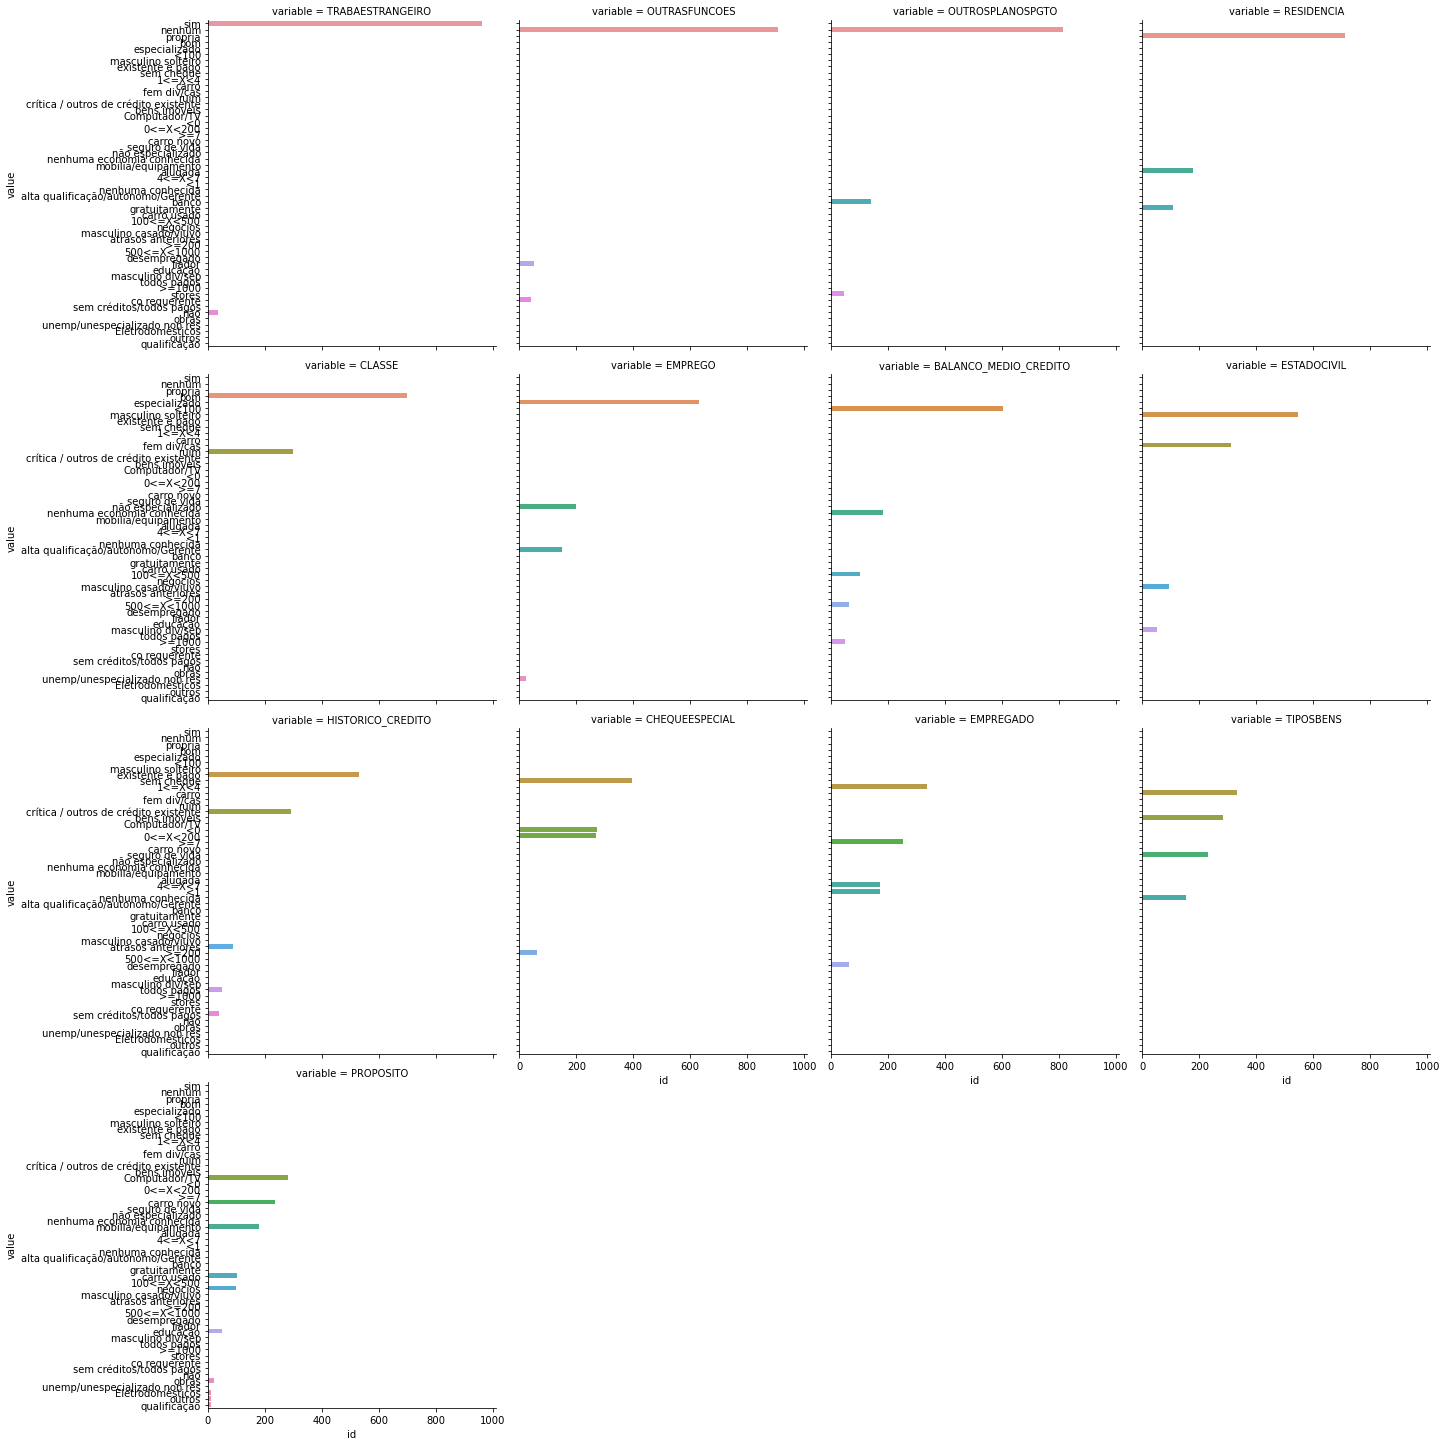

In [3]:
# Gráficos de Barras para as Categóricas

df_melt_cat = df.melt(id_vars=[chave_id], value_vars=df.select_dtypes("object"))
df_melt_cat = df_melt_cat.groupby(["variable", "value"]).count().sort_values(by = [chave_id, "variable"], ascending=False)
sns.catplot(data=df_melt_cat.reset_index(), y = "value", x=chave_id, kind = "bar", col = "variable", col_wrap = 4, 
            facet_kws={"sharey":False, "sharex":False})
plt.show()

<ipython-input-46-dcbe5345be3f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


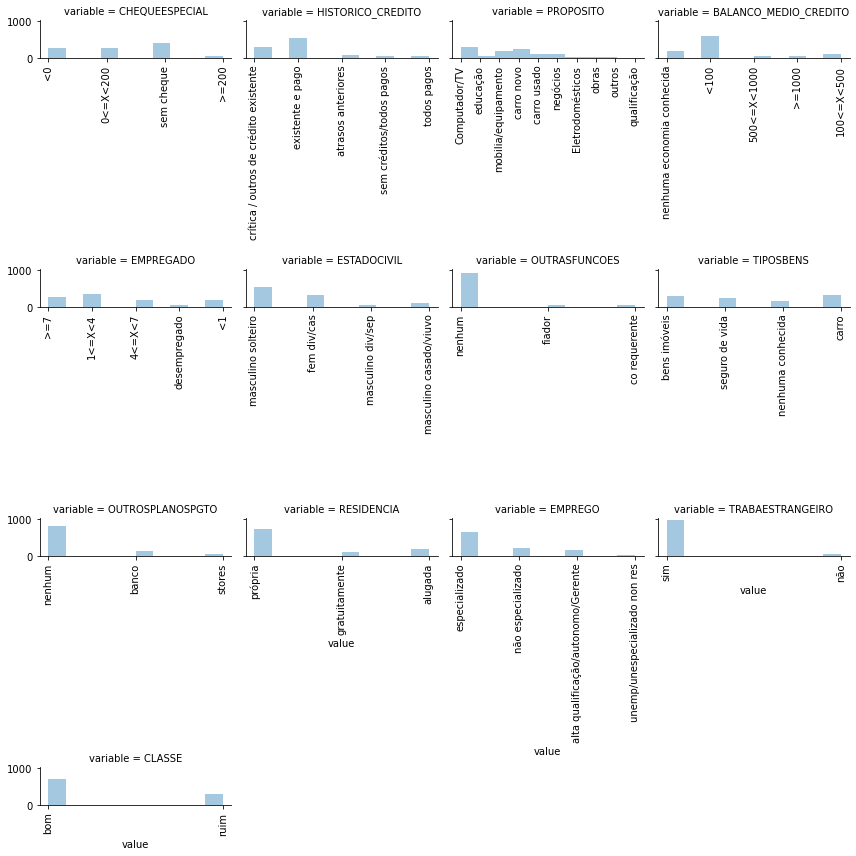

In [46]:
# Mas também não consegui ordernar....

df_melt_cat = df.melt(id_vars=[chave_id], value_vars=df.select_dtypes("object"))
g = sns.FacetGrid(df_melt_cat, 
                  col="variable",
                  col_wrap=4, 
                  sharex=False
                 )
plot = g.map(plt.hist, "value", alpha=.4)#.fig.subplots_adjust(wspace=0.5, hspace=2)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
plt.tight_layout()

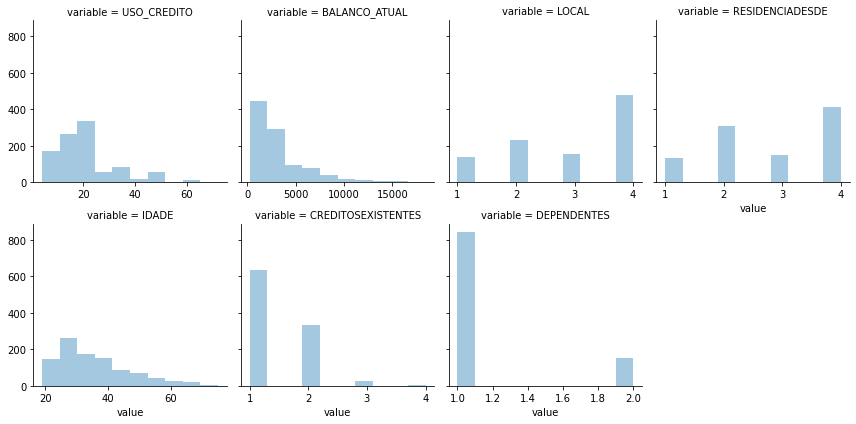

In [8]:
# Histogramas para as Numéricas

df_melt_num = df.melt(id_vars=[chave_id], value_vars=df.select_dtypes(["float64", "int64"]))
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, sharex=False)
g.map(plt.hist, "value", alpha=.4)

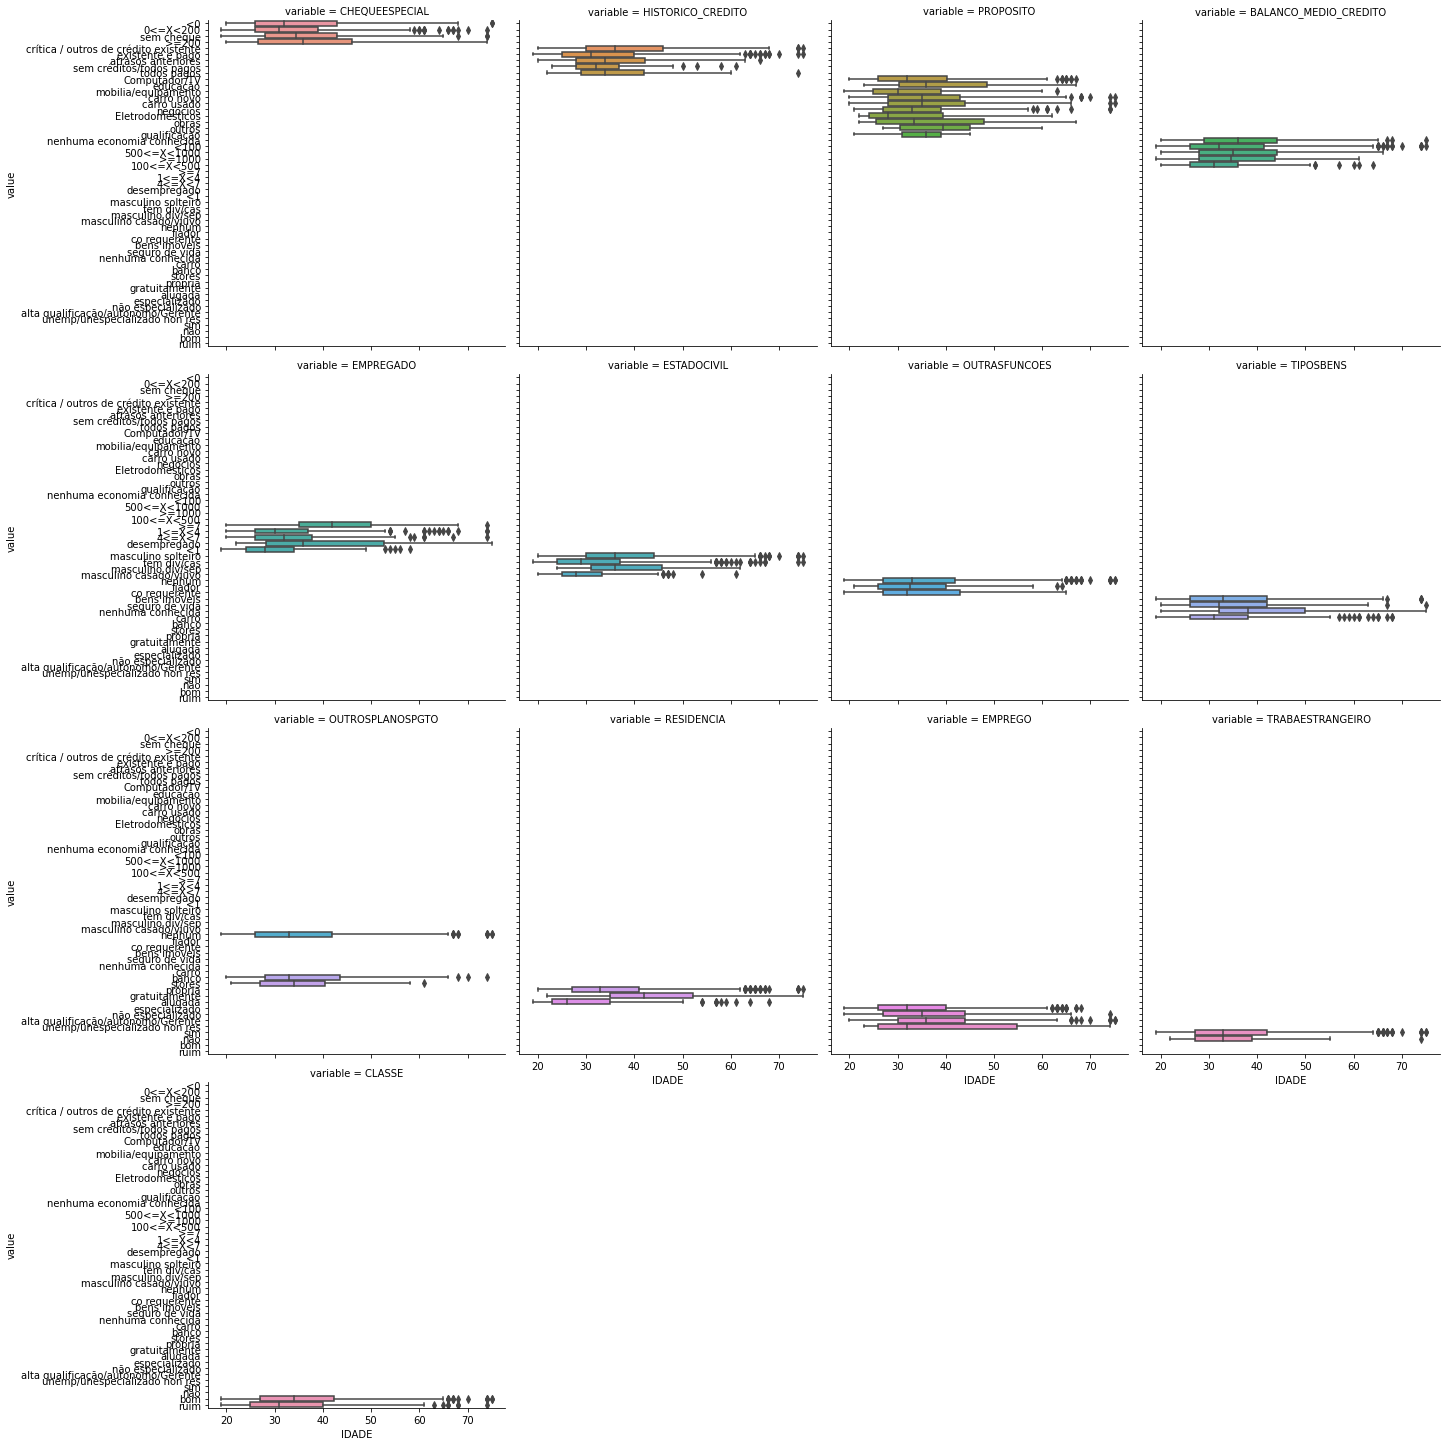

In [7]:
# Boxplots para Comparar Target Numérico e Variáveis Categóricas

df_melt_cat = df.melt(id_vars=[chave_id, target_num], value_vars=df.select_dtypes("object"))
sns.catplot(data=df_melt_cat.reset_index(), y = "value", x=target_num, kind = "box", col = "variable", col_wrap = 4, 
            facet_kws={"sharey":False, "sharex":False})
plt.show()

C:\Users\laura\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: Could not interpret input 'IDADE'

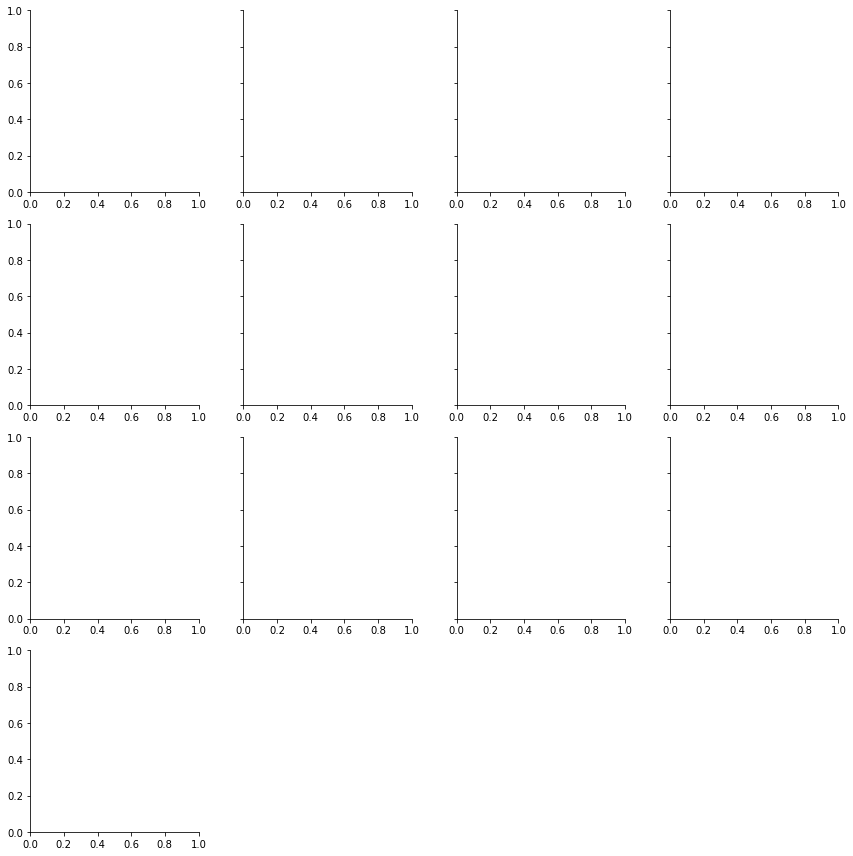

In [15]:
df_melt_cat = df.melt(id_vars=[chave_id, target_num], value_vars=df.select_dtypes("object"))
g = sns.FacetGrid(df_melt_cat, 
                  col="variable",
                  col_wrap=4, 
                  sharex=False
                 )
plot = g.map(sns.boxplot, x="value", y=target_num, alpha=.4)#.fig.subplots_adjust(wspace=0.5, hspace=2)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
plt.tight_layout()

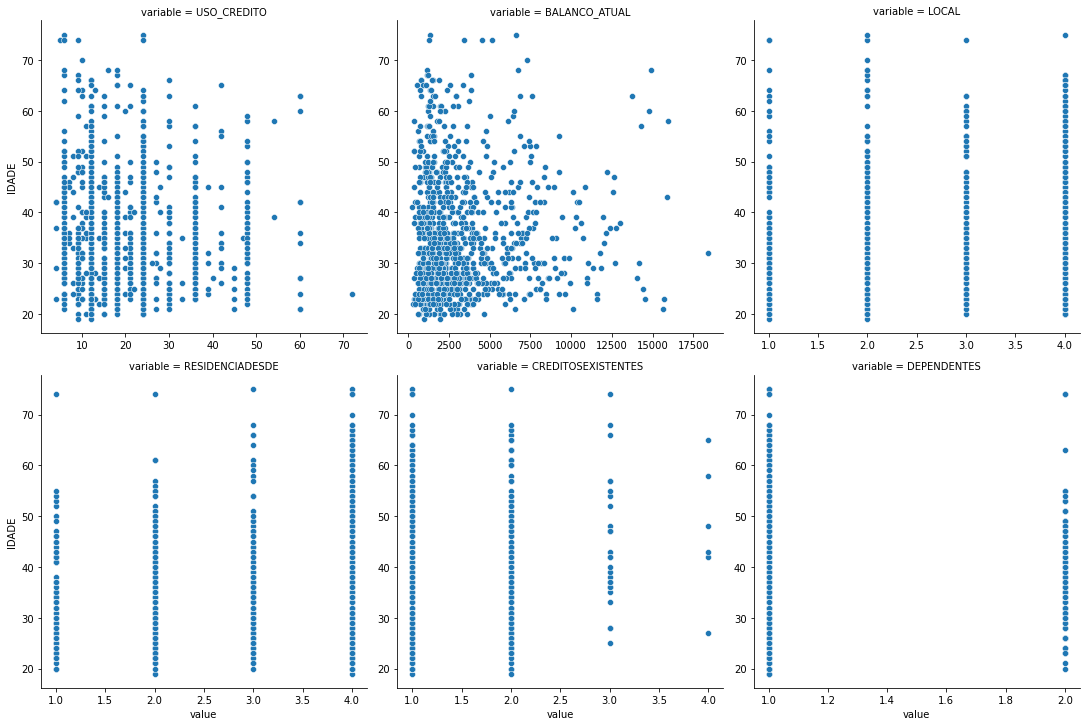

In [26]:
# Gráficos de Dispersão para Comparar Target Numérico e Variáveis Numéricas

df_melt_num = df.melt(id_vars=[chave_id, target_num], value_vars=df.drop(target_num, axis=1).select_dtypes(["float64", "int64"]))
sns.relplot(data=df_melt_num, x="value", y=target_num, kind="scatter", col="variable", col_wrap=3,
            facet_kws={"sharey": False, "sharex":False}) 
plt.show()

<AxesSubplot:>

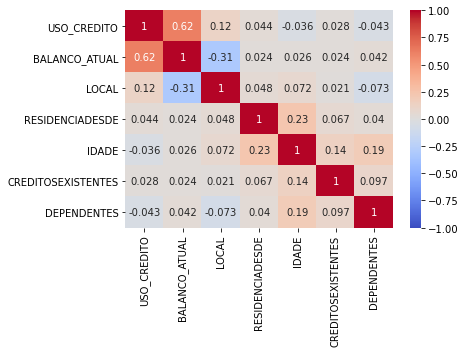

In [27]:
# Matriz de Correlação para Comparar Target Numérico e Variáveis Numéricas

sns.heatmap(df.select_dtypes(["float64", "int64"]).corr(method="spearman"), 
            vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
# Ainda quero que fique triangular aqui

<AxesSubplot:xlabel='CLASSE'>

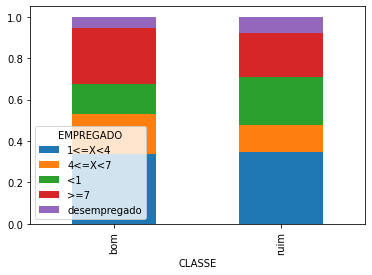

In [28]:
pd.crosstab(index=df[target_cat], columns=df["EMPREGADO"], normalize = "index").plot.bar(stacked=True)

In [29]:
pd.crosstab(index=df_melt_cat[target_cat], columns=df_melt_cat["value"], normalize = "index")#.shape

value,0<=X<200,100<=X<500,1<=X<4,4<=X<7,500<=X<1000,<0,<1,<100,>=1000,>=200,>=7,Computador/TV,Eletrodomésticos,alta qualificação/autonomo/Gerente,alugada,atrasos anteriores,banco,bens imóveis,carro,carro novo,carro usado,co requerente,crítica / outros de crédito existente,desempregado,educação,especializado,existente e pago,fem div/cas,fiador,gratuitamente,masculino casado/viuvo,masculino div/sep,masculino solteiro,mobilia/equipamento,negócios,nenhum,nenhuma conhecida,nenhuma economia conhecida,não,não especializado,obras,outros,própria,qualificação,seguro de vida,sem cheque,sem créditos/todos pagos,sim,stores,todos pagos,unemp/unespecializado non res
CLASSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bom,0.019524,0.008214,0.027976,0.016071,0.006190,0.016548,0.012143,0.045952,0.005000,0.005833,0.022500,0.025952,0.000952,0.011548,0.012976,0.007143,0.009762,0.026429,0.027381,0.017262,0.010238,0.002738,0.028929,0.004643,0.003333,0.052857,0.042976,0.023929,0.005000,0.007619,0.007976,0.003571,0.047857,0.014643,0.007500,0.145833,0.010357,0.017976,0.003929,0.017143,0.001667,0.000833,0.062738,0.000952,0.019167,0.041429,0.001786,0.079405,0.003333,0.002500,0.001786
ruim,0.029167,0.009444,0.028889,0.010833,0.003056,0.037500,0.019444,0.060278,0.001667,0.003889,0.017778,0.017222,0.001111,0.014167,0.019444,0.007778,0.015833,0.016667,0.028333,0.024722,0.004722,0.005000,0.013889,0.006389,0.006111,0.051667,0.046944,0.030278,0.002778,0.012222,0.006944,0.005556,0.040556,0.016111,0.009444,0.137778,0.018611,0.008889,0.001111,0.015556,0.002222,0.001389,0.051667,0.000278,0.019722,0.012778,0.006944,0.082222,0.005278,0.007778,0.001944


<AxesSubplot:xlabel='value,variable'>

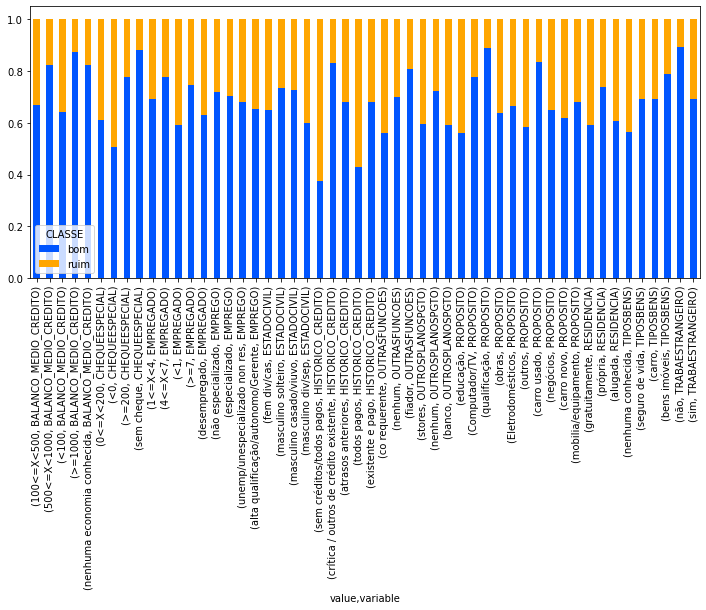

In [38]:
# Gráfico de Barras Empilhadas para Target Categórico e Variáveis Categóricas
# Ai, nessa versão eu teria que levar um tempo até analisar certinho separando pelas variáveis...

df_melt_cat = df.melt(id_vars=[chave_id, target_cat], value_vars=df.drop(target_cat, axis=1).select_dtypes("object"))
#df_melt_cat = df_melt_cat.set_index("variable")
cross_tab_prop = pd.crosstab(columns=df_melt_cat[target_cat],
                             index=[df_melt_cat["value"], df_melt_cat["variable"]],
                             normalize="index").sort_values("variable")
cross_tab_prop.plot(kind="bar", stacked=True, figsize=(12, 5), color=["#0055FF", "#FFA600"])

In [ ]:
# Boxplots para Comparar Target Categórico e Variáveis Numéricas

<AxesSubplot:xlabel='date'>

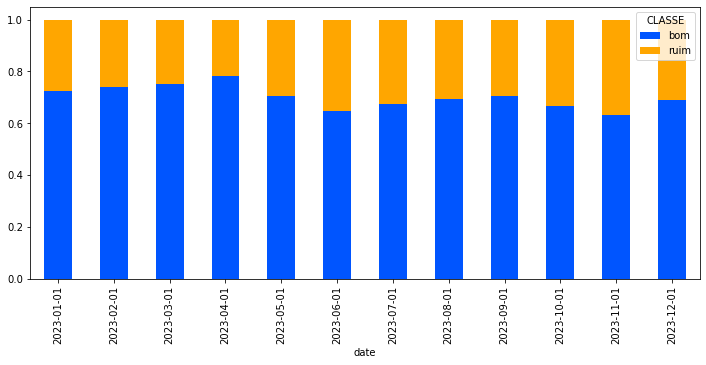

In [13]:
# Comportamento das Variáveis pelo tempo

#df_melt_cat = df.melt(id_vars=[chave_id, target_cat], value_vars=df.drop(target_cat, axis=1).select_dtypes("object"))
#df_melt_cat = df_melt_cat.set_index("variable")
cross_tab_prop = pd.crosstab(columns=df[target_cat],
                             index=df[target_date],
                             normalize="index")
cross_tab_prop.plot(kind="bar", stacked=True, figsize=(12, 5), color=["#0055FF", "#FFA600"])

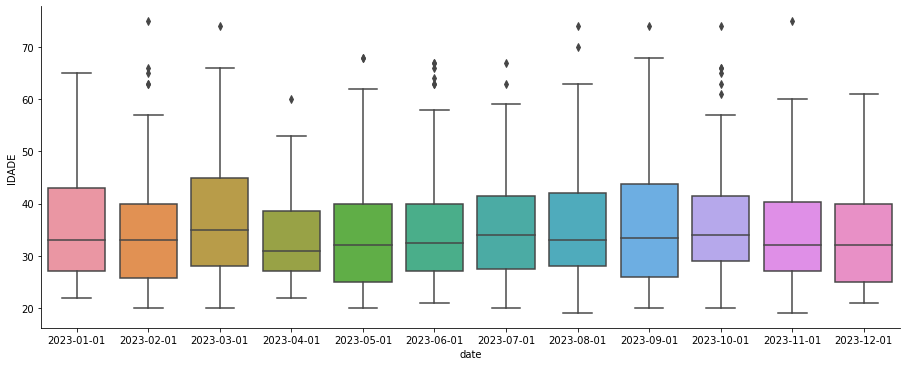

In [18]:
sns.catplot(data = df.sort_values(target_date), x=target_date, y=target_num, kind="box", height=5, aspect=2.5)

# Análises utilizando Pyspark